https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

# Multiclass Text Classification - DL and Embedding layer

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import re
import os
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
from keras.preprocessing import text, sequence
from keras.preprocessing.sequence import pad_sequences

os.chdir('C:\\Users\\barry\\OneDrive - CSTBGroup\\image_ds\\images')


X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

X = X
y = y

df = X.merge(y, right_index = True, left_index = True)

df.drop(["productid", "imageid"], axis = 1, inplace = True)
df.head()

,designation,description,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,2705


In [139]:
df['description'] = df['description'].str.replace(r'\d+', '')
df['designation'] = df['designation'].str.replace(r'\d+', '')


df['description']=df['description'].astype(str)

In [140]:
print("Nombre de mots - variable designation : " , df['designation'].apply(lambda x: len(x.split(' '))).sum())
print("Nombre de mots - variable description : " , df['description'].apply(lambda x: len(x.split(' '))).sum())

Nombre de mots - variable designation :  989350
Nombre de mots - variable description :  6887832


# Text Pre-processing

To get an idea of what needs to be deleted :

In [141]:
def print_plot(index):
    example = df[df.index == index][['designation', 'prdtypecode']].values[0]
    example2 = df[df.index == index][['description', 'prdtypecode']].values[0]
    try : 
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            print('DESCRIPTION : ', example2[0])
    except :
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            
def print_plotbis(index):
    example = dfbis[dfbis.index == index][['designation', 'prdtypecode']].values[0]
    example2 = dfbis[dfbis.index == index][['description', 'prdtypecode']].values[0]
    try : 
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            print('DESCRIPTION : ', example2[0])
    except :
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])            

Text cleaning :

In [142]:
df['description'] = df['description'].str.replace('\d+', '')
df['designation'] = df['designation'].str.replace(r'\d+', '')

dfbis = df.copy()
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^\w +-_]')

STOPWORDS = set(stopwords.words('english'))
STOPWORDS2 = set(stopwords.words('french'))
STOPWORDS3 = set(stopwords.words('german'))
Mail = re.compile(r'\S*@\S*\s?')

letter = re.compile(r'\s+\w{1,2}\s+')
letter2 = re.compile(r'^(\w){1}\s+')
letter3 = re.compile(r'^(\w){2}\s+')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = Mail.sub(' ', text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS2) # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS3) # remove stopwors from text
    text = letter.sub('', text)
    text = letter2.sub('', text)
    text = letter3.sub('', text)
    return text
df['designation'] = df['designation'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)

print("Nombre de mots - variable designation : " , df['designation'].apply(lambda x: len(x.split(' '))).sum())
print("Nombre de mots - variable description : " , df['description'].apply(lambda x: len(x.split(' '))).sum())

Nombre de mots - variable designation :  696515
Nombre de mots - variable description :  4318930


In [143]:
for i in np.random.random_integers(0,df.shape[0], 4) :
    print(print_plotbis(i))
    print()
    print(print_plot(i))
    print()
    print()

prdtypecode: 2583
Liner Bleu Gre xx
DESCRIPTION :  Liner PVC bleu Gre FPROV Donnez une touche élégante et lisse à votre piscine avec le liner bleu de haute qualité. Liner avec système d&#;accroche (SC). Liner de PVC /. Mesures:  cm de long  cm de large et  cm de haut.
None

prdtypecode: 2583
liner bleu gre xx
DESCRIPTION :  liner pvc bleugre fprov donnez unetouche élégante lisse piscine linerbleu haute qualité. liner système accroche. liner pvc . mesures:longlargeethaut.
None


prdtypecode: 10
On-Call In Oral & Maxillofacial e Pb
DESCRIPTION :  nan
None

prdtypecode: 10
on-call oral maxillofacialpb
DESCRIPTION :  nan
None


prdtypecode: 2522
Bic Crayon Graphite Tête Trempée Mine b Conte Criterium 
DESCRIPTION :  Pour le bureau le dessin technique et artistique.<br>Corps hexagonal en bois de haute qualité.
None

prdtypecode: 2522
bic crayon graphite tête trempée mineconte criterium
DESCRIPTION :  bureau dessin technique artistique.<br>corps hexagonal bois haute qualité.
None


prdtypeco

<ipython-input-143-95278cadca03>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 84916 + 1) instead
  for i in np.random.random_integers(0,df.shape[0], 4) :


## DATA TRANSFORMATION

In [144]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


tokenizer = text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df["designation"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 74349 unique tokens.


{'piscine': 1,
 'lot': 2,
 'jeu': 3,
 'coussin': 4,
 'générique': 5,
 'kit': 6,
 'taie': 7,
 'enfants': 8,
 'blanc': 9,
 'bois': 10,
 'led': 11,
 'pcs': 12,
 'cm': 13,
 'décor': 14,
 'bébé': 15,
 'noël': 16,
 'home': 17,
 'sac': 18,
 'décoration': 19,
 'noir': 20,
 'notes': 21,
 'bâche': 22,
 'jeux': 23,
 'bleu': 24,
 'carte': 25,
 'mini': 26,
 'couverture': 27,
 'doreiller': 28,
 'canapé': 29,
 'journal': 30,
 'drone': 31,
 'dji': 32,
 'jouet': 33,
 'portable': 34,
 'acier': 35,
 'cadeau': 36,
 'lampe': 37,
 'cuisine': 38,
 'jardin': 39,
 'magideal': 40,
 'gris': 41,
 'jouets': 42,
 'set': 43,
 'table': 44,
 'console': 45,
 'spa': 46,
 'figurine': 47,
 'housse': 48,
 'carnet': 49,
 'x': 50,
 'lit': 51,
 'porte': 52,
 'pompe': 53,
 'toy': 54,
 'coton': 55,
 'tapis': 56,
 'voiture': 57,
 'classique': 58,
 'g': 59,
 'bricolage': 60,
 'bulles': 61,
 'tissu': 62,
 'rouge': 63,
 'bloc': 64,
 'case': 65,
 'support': 66,
 'maison': 67,
 'téléchargement': 68,
 'peinture': 69,
 'douche': 70,
 '

In [145]:
X = tokenizer.texts_to_sequences(df["designation" ].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (84916, 250)


In [146]:
Y = pd.get_dummies(df['prdtypecode']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (84916, 27)


In [156]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X,df.prdtypecode, test_size = 0.20, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(67932, 250) (67932, 27)
(16984, 250) (16984, 27)


## MODELISATION

In [161]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,SpatialDropout1D, Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
850/850 [==============================] - 1062s 1s/step - loss: 2.1674 - accuracy: 0.3862 - val_loss: 0.9363 - val_accuracy: 0.7219
Epoch 2/5
850/850 [==============================] - 1019s 1s/step - loss: 0.7780 - accuracy: 0.7676 - val_loss: 0.8103 - val_accuracy: 0.7571
Epoch 3/5
850/850 [==============================] - 1231s 1s/step - loss: 0.5699 - accuracy: 0.8288 - val_loss: 0.7994 - val_accuracy: 0.7639
Epoch 4/5
850/850 [==============================] - 953s 1s/step - loss: 0.4538 - accuracy: 0.8624 - val_loss: 0.8230 - val_accuracy: 0.7657
Epoch 5/5
850/850 [==============================] - 588s 692ms/step - loss: 0.3957 - accuracy: 0.8790 - val_loss: 0.8526 - val_accuracy: 0.7689


## EVALUATION

In [167]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

531/531 [==============================] - 24s 45ms/step - loss: 0.8626 - accuracy: 0.7645
Test set
  Loss: 0.863
  Accuracy: 0.765


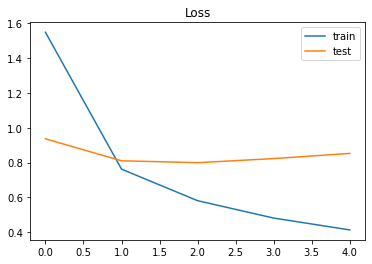

In [168]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

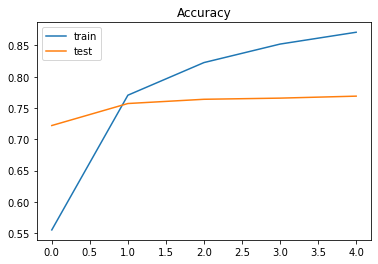

In [169]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [170]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis = 1)

In [171]:
from sklearn.metrics import classification_report
print(classification_report(Y_test.argmax(axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.41      0.30      0.34       612
           1       0.72      0.61      0.66       521
           2       0.74      0.77      0.76       357
           3       0.84      0.82      0.83       161
           4       0.71      0.73      0.72       539
           5       0.85      0.90      0.88       786
           6       0.59      0.59      0.59       146
           7       0.60      0.65      0.62       961
           8       0.54      0.42      0.47       424
           9       0.86      0.89      0.88       974
          10       0.93      0.90      0.92       169
          11       0.77      0.75      0.76       507
          12       0.71      0.73      0.72       672
          13       0.80      0.82      0.81      1013
          14       0.89      0.91      0.90       841
          15       0.83      0.77      0.80       137
          16       0.80      0.79      0.79      1029
          17       0.80    